# [SemEval 2023 Task 1](https://raganato.github.io/vwsd/)

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import keras
import random

In [ ]:
# to access google drive folder
from google.colab import drive
drive.mount('/content/drive') # When you run this you'll be prompted for a token - follow the link to generate this.
#        "/content/drive/MyDrive/...path/to/dir
path = "/content/drive/MyDrive/semeval-2023/task-1/"

# Comment this out if you are using Google Colab, otherwise just change to local directory where the data is located
# path = "/mnt/d/Abdullah LOL/BigData/semeval-2023-task-1-V-WSD-train-v1/"

Mounted at /content/drive


In [ ]:
import os
os.listdir(path)

['README', 'trial_v1']

# *First Using Trial Data*

This is to check everything is working as expected

In [ ]:
# Laoding Data
dataset = pd.read_csv(path + "trial_v1/trial.data.v1.txt", 
                sep = "\t", 
                names = ["target_word", "full_phrase", "image_1", "image_2", "image_3", "image_4",
                         "image_5", "image_6", "image_7", "image_8", "image_9", "image_10"])

In [ ]:
dataset.head()

,target_word,full_phrase,image_1,image_2,image_3,image_4,image_5,image_6,image_7,image_8,image_9,image_10
0,andromeda,andromeda tree,image.155.jpg,image.68.jpg,image.9.jpg,image.72.jpg,image.158.jpg,image.86.jpg,image.7.jpg,image.132.jpg,image.36.jpg,image.27.jpg
1,angora,angora city,image.5.jpg,image.52.jpg,image.96.jpg,image.70.jpg,image.46.jpg,image.91.jpg,image.76.jpg,image.139.jpg,image.14.jpg,image.115.jpg
2,anteater,marsupial anteater,image.147.jpg,image.16.jpg,image.107.jpg,image.135.jpg,image.93.jpg,image.59.jpg,image.88.png,image.131.jpg,image.89.jpg,image.121.jpg
3,bank,bank erosion,image.104.jpg,image.64.jpg,image.108.jpg,image.80.jpg,image.21.jpg,image.99.jpg,image.117.jpg,image.146.jpg,image.87.jpg,image.34.jpg
4,router,internet router,image.127.jpg,image.0.jpg,image.20.jpg,image.18.jpg,image.112.jpg,image.97.jpg,image.24.jpg,image.1.jpg,image.56.jpg,image.26.jpg


In [ ]:
gold_labels = open(path + "trial_v1/trial.gold.v1.txt").read().splitlines()

In [ ]:
print(len(gold_labels))
print(gold_labels)

16
['image.86.jpg', 'image.70.jpg', 'image.107.jpg', 'image.64.jpg', 'image.18.jpg', 'image.156.jpg', 'image.54.jpg', 'image.28.jpg', 'image.124.jpg', 'image.118.jpg', 'image.71.jpg', 'image.134.jpg', 'image.25.jpg', 'image.149.jpg', 'image.85.jpg', 'image.103.jpg']


## Create NumPy out of Gold Labels Images and Creating NumPy Labels for Target Word + Full Phrase in Order of Gold Label

In [ ]:
print(os.listdir(path + "trial_v1/trial_images_v1/"))

['image.45.jpg', 'image.58.jpg', 'image.134.jpg', 'image.116.jpg', 'image.25.jpg', 'image.153.jpg', 'image.149.jpg', 'image.85.jpg', 'image.103.jpg', 'image.31.jpg', 'image.86.jpg', 'image.132.jpg', 'image.70.jpg', 'image.91.jpg', 'image.66.jpg', 'image.46.jpg', 'image.14.jpg', 'image.135.jpg', 'image.131.jpg', 'image.107.jpg', 'image.93.jpg', 'image.94.jpg', 'image.147.jpg', 'image.73.jpg', 'image.99.jpg', 'image.34.jpg', 'image.87.jpg', 'image.146.jpg', 'image.80.jpg', 'image.64.jpg', 'image.21.jpg', 'image.121.jpg', 'image.109.jpg', 'image.158.jpg', 'image.50.jpg', 'image.155.jpg', 'image.115.jpg', 'image.139.jpg', 'image.48.jpg', 'image.152.jpg', 'image.81.jpg', 'image.78.jpg', 'image.92.jpg', 'image.110.jpg', 'image.38.jpg', 'image.40.jpg', 'image.145.jpg', 'image.10.jpg', 'image.63.jpg', 'image.90.jpg', 'image.108.jpg', 'image.98.jpg', 'image.126.jpg', 'image.67.jpg', 'image.77.jpg', 'image.12.jpg', 'image.129.jpg', 'image.19.jpg', 'image.69.jpg', 'image.111.jpg', 'image.130.jpg'

In [ ]:
print([path + "trial_v1/trial_images_v1/" + image for image in gold_labels])

['/content/drive/MyDrive/semeval-2023/task-1/trial_v1/trial_images_v1/image.86.jpg', '/content/drive/MyDrive/semeval-2023/task-1/trial_v1/trial_images_v1/image.70.jpg', '/content/drive/MyDrive/semeval-2023/task-1/trial_v1/trial_images_v1/image.107.jpg', '/content/drive/MyDrive/semeval-2023/task-1/trial_v1/trial_images_v1/image.64.jpg', '/content/drive/MyDrive/semeval-2023/task-1/trial_v1/trial_images_v1/image.18.jpg', '/content/drive/MyDrive/semeval-2023/task-1/trial_v1/trial_images_v1/image.156.jpg', '/content/drive/MyDrive/semeval-2023/task-1/trial_v1/trial_images_v1/image.54.jpg', '/content/drive/MyDrive/semeval-2023/task-1/trial_v1/trial_images_v1/image.28.jpg', '/content/drive/MyDrive/semeval-2023/task-1/trial_v1/trial_images_v1/image.124.jpg', '/content/drive/MyDrive/semeval-2023/task-1/trial_v1/trial_images_v1/image.118.jpg', '/content/drive/MyDrive/semeval-2023/task-1/trial_v1/trial_images_v1/image.71.jpg', '/content/drive/MyDrive/semeval-2023/task-1/trial_v1/trial_images_v1/im

In [ ]:
# Gold Labels NumPy
# Read image then convert it into RGB for all gold_labels then make that list as a NumPy Array
glnp = np.array([cv2.cvtColor(cv2.imread(path + "trial_v1/trial_images_v1/" + image), cv2.COLOR_BGR2RGB) for image in gold_labels], dtype=object)

# target_word labels corresponding to the order of glnp above
tw_labels = np.array([target_word for target_word in dataset["target_word"]])

# full_phrase labels corresponding to the order of glnp above
fp_labels = np.array([full_phrase for full_phrase in dataset["full_phrase"]])

In [ ]:
print(tw_labels.shape)
print(random.choice(tw_labels).shape)
print(tw_labels)

(16,)
()
['andromeda' 'angora' 'anteater' 'bank' 'router' 'stick' 'swing' 'tube'
 'venus' 'wheel' 'white' 'acrobatics' 'adalia' 'administration' 'amber'
 'ambrosia']


In [ ]:
print(fp_labels.shape)
print(random.choice(fp_labels).shape)
print(fp_labels)

(16,)
()
['andromeda tree' 'angora city' 'marsupial anteater' 'bank erosion'
 'internet router' 'centre stick' 'swing hit' 'london tube'
 'venus surface' 'breaking wheel' 'white yolk' 'acrobatics maneuvers'
 'biology adalia' 'administration prime minister' 'amber bijoux'
 'ambrosia food']


In [ ]:
print(glnp.shape)
print(random.choice(glnp).shape)

(16,)
(368, 550, 3)


In [ ]:
print(glnp.shape[0])
print(random.randint(0, glnp.shape[0] - 1))

16
11


Text(0.5, 1.0, 'Target Word: administration, Full Phrase: administration prime minister, Shape: (3825, 5615, 3)')

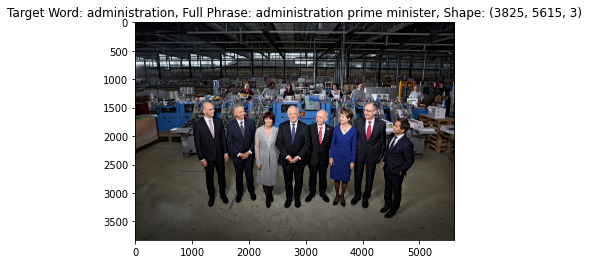

In [ ]:
choice = random.randint(0, glnp.shape[0] - 1)
plt.imshow(glnp[choice])
plt.title(f"Target Word: {tw_labels[choice]}, Full Phrase: {fp_labels[choice]}, Shape: {glnp[choice].shape}")

In [ ]:
glnp_copy = np.array(glnp, copy=True)

In [ ]:
print(glnp_copy.shape)
print(random.choice(glnp_copy).shape)

(16,)
(1008, 1344, 3)


## Resizing the Images to (224, 224, 3) for ResNet


In [ ]:
glnp_resized = np.array([cv2.resize(image, dsize = (224, 224), interpolation = cv2.INTER_AREA) for image in glnp_copy])

In [ ]:
print(glnp_resized.shape)
print(random.choice(glnp_resized).shape)

(16, 224, 224, 3)
(224, 224, 3)


In [ ]:
print(glnp.shape)
print(random.choice(glnp).shape)

(16,)
(900, 1200, 3)


Text(0.5, 1.0, 'Target Word: administration, Full Phrase: administration prime minister, Shape: (224, 224, 3)')

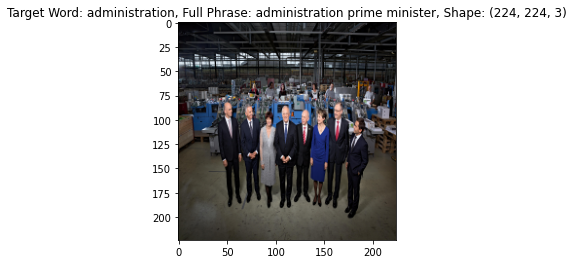

In [ ]:
plt.imshow(glnp_resized[choice])
plt.title(f"Target Word: {tw_labels[choice]}, Full Phrase: {fp_labels[choice]}, Shape: {glnp_resized[choice].shape}")

[Automatically preprocess the input images for ResNet models](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/preprocess_input)

In [ ]:
glnp_resized_copy = np.array(glnp_resized, copy=True)

In [ ]:
print(glnp_resized_copy.shape)
print(random.choice(glnp_resized_copy).shape)

(16, 224, 224, 3)
(224, 224, 3)


In [ ]:
print(glnp_resized.shape)
print(random.choice(glnp_resized).shape)

(16, 224, 224, 3)
(224, 224, 3)


In [ ]:
# Preprocessed using https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/preprocess_input
glnp_resized_pre = tf.keras.applications.resnet50.preprocess_input(glnp_resized_copy)

In [ ]:
print(glnp_resized_pre.shape)
print(random.choice(glnp_resized_pre).shape)

(16, 224, 224, 3)
(224, 224, 3)


In [ ]:
print(glnp_resized_copy.shape)
print(random.choice(glnp_resized_copy).shape)

(16, 224, 224, 3)
(224, 224, 3)


How the colour range look like now

In [ ]:
print(glnp_resized_pre[0][0])

[[ -96.939       -88.779      -110.68      ]
 [-103.939       -95.779      -120.68      ]
 [-102.939      -100.779      -100.68      ]
 [-102.939      -107.779       -75.68      ]
 [-103.939      -104.779       -87.68      ]
 [-103.939      -103.779       -92.68      ]
 [-100.939      -103.779       -94.68      ]
 [-102.939       -90.779      -100.68      ]
 [-101.939       -74.779      -102.68      ]
 [-102.939       -82.779      -117.68      ]
 [-100.939       -82.779      -119.68      ]
 [ -97.939       -77.779      -107.68      ]
 [ -84.939       -71.779       -92.68      ]
 [ -55.939003    -55.779       -83.68      ]
 [ -68.939       -64.779       -96.68      ]
 [ -99.939       -88.779      -120.68      ]
 [-102.939       -86.779      -122.68      ]
 [ -97.939       -67.779      -110.68      ]
 [ -79.939       -49.779       -90.68      ]
 [ -65.939       -45.779       -80.68      ]
 [ -57.939003    -42.779       -73.68      ]
 [ -51.939003    -42.779       -68.68      ]
 [ -46.939

In [ ]:
print(glnp_resized_copy[0][0])

[[ 13  28   7]
 [  3  21   0]
 [ 23  16   1]
 [ 48   9   1]
 [ 36  12   0]
 [ 31  13   0]
 [ 29  13   3]
 [ 23  26   1]
 [ 21  42   2]
 [  6  34   1]
 [  4  34   3]
 [ 16  39   6]
 [ 31  45  19]
 [ 40  61  48]
 [ 27  52  35]
 [  3  28   4]
 [  1  30   1]
 [ 13  49   6]
 [ 33  67  24]
 [ 43  71  38]
 [ 50  74  46]
 [ 55  74  52]
 [ 57  76  57]
 [ 59  77  61]
 [ 57  73  58]
 [ 45  61  46]
 [ 18  45  19]
 [ 16  39   5]
 [ 62  50   9]
 [ 75  51  14]
 [ 30  49   6]
 [ 17  53   4]
 [ 24  64   5]
 [ 26  60   9]
 [ 10  38   4]
 [ 15  35   2]
 [ 13  29   4]
 [  0  19   1]
 [  1  17   1]
 [  1  24   2]
 [ 30  58  27]
 [ 69  90  65]
 [ 60  84  58]
 [ 57  82  55]
 [ 57  82  55]
 [ 62  86  61]
 [ 62  87  58]
 [ 53  76  58]
 [ 51  73  52]
 [ 35  60  28]
 [ 26  56  24]
 [ 30  61  24]
 [ 19  54  15]
 [ 20  53  22]
 [ 26  57  27]
 [ 24  56  26]
 [ 25  58  32]
 [ 21  54  17]
 [  3  37   2]
 [ 13  33   1]
 [ 20  36   1]
 [  2  24   2]
 [  1  18   2]
 [ 26  56  14]
 [ 47  80  32]
 [ 63  88  48]
 [ 71  95 

Text(0.5, 1.0, 'Target Word: administration, Full Phrase: administration prime minister, Shape: (224, 224, 3)')

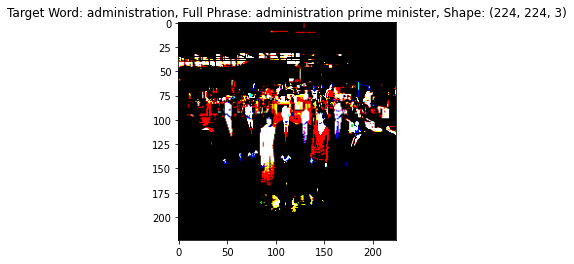

In [ ]:
plt.imshow(glnp_resized_pre[choice])
plt.title(f"Target Word: {tw_labels[choice]}, Full Phrase: {fp_labels[choice]}, Shape: {glnp_resized_pre[choice].shape}")

In [ ]:
# Uses ImageNet weights by default
model = tf.keras.applications.ResNet50()
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer='adam', metrics=['accuracy'])
model.summary()

102967424/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [ ]:
print(glnp_resized_pre[choice].shape)

(224, 224, 3)


In [ ]:
print(glnp_resized_pre[choice].reshape(-1, 224, 224, 3).shape)

(1, 224, 224, 3)


In [ ]:
# model.predict(glnp_resized_pre[choice])
pred = model.predict(glnp_resized_pre[choice].reshape(-1, 224, 224, 3))
# Returns tuple of (class_name, class_description, score) https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/decode_predictions
decoded_pred = tf.keras.applications.resnet50.decode_predictions(pred)
print(decoded_pred)

35363/35363 [==============================] - 0s 0us/step
[[('n02927161', 'butcher_shop', 0.7078201), ('n03461385', 'grocery_store', 0.073119506), ('n04501370', 'turnstile', 0.055754803), ('n03630383', 'lab_coat', 0.031217922), ('n04005630', 'prison', 0.023864381)]]


In [ ]:
print(decoded_pred[0][0][1])

butcher_shop


In [ ]:
top5 = [prediction[1] + " " + str(round(prediction[2] * 100, 2)) + "%" for prediction in decoded_pred[0]]

In [ ]:
for result in top5:
  print(result)

butcher_shop 70.78%
grocery_store 7.31%
turnstile 5.58%
lab_coat 3.12%
prison 2.39%


Text(0.5, 1.0, 'Target Word: administration, Full Phrase: administration prime minister, Prediction: butcher_shop 70.78%')

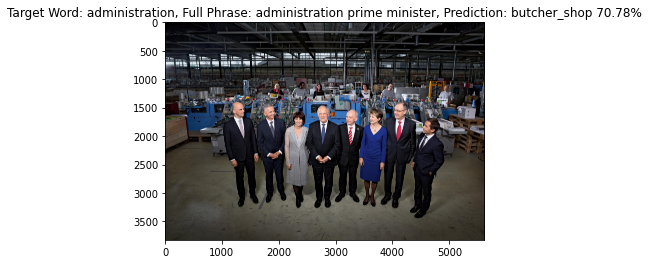

In [ ]:
plt.imshow(glnp[choice])
plt.title(f"Target Word: {tw_labels[choice]}, Full Phrase: {fp_labels[choice]}, Prediction: {decoded_pred[0][0][1]} {round(decoded_pred[0][0][2] * 100, 2)}%")